In [45]:
import numpy as np
from scipy.integrate import BDF
from scipy.optimize import newton
from matplotlib import pyplot as plt

In [46]:
def y_derivative(t, y, k1=0.04, k2=3e7, k3=1e4):
    dy = np.zeros(3)
    y1, y2, y3 = y
    dy[0] = -k1*y1 + k3*y2*y3
    dy[1] = k1*y1 - k3*y2*y3 - k2*y2**2
    dy[2] = k2*y2**2
    return dy

In [47]:
#initial state
y0 = np.array([1, 0, 0])
t_1 = 0.3

In [48]:
#bdf realization
def func_for_newton_method(y_next, y, y_prev, step_size):
    return 1.5*y_next - 2*y + 0.5*y_prev - step_size*y_derivative(0, y_next)

def calculate_by_bdf(y0, t_1, step_size=0.001):
    y_prev = y0
    t = 0
    t_array = []
    y_array = []
    y = y_prev + step_size*y_derivative(0, y_prev)
    
    while t < t_1:
        y_array.append(y)
        t_array.append(t)
        
        y_next = newton(func_for_newton_method, y, args=(y, y_prev, step_size))
        y_prev = y
        y = y_next
        t = t + step_size
    return t_array, np.array(y_array)

x, y = calculate_by_bdf(y0, t_1, 0.0001)

In [51]:
#library method
def calculate_by_scipy_bdf(func, y0, t_1, max_step=0.001):
    solver = BDF(func, 0, y0, t_1, max_step=max_step)
    y_array = []
    t_array = []

    while solver.status!='finished':
        solver.step()
        current_inter = solver.dense_output()
        y_array.append(current_inter(solver.t))
        t_array.append(solver.t)
        
    return t_array, np.array(y_array)

scipy_x, scipy_y = calculate_by_scipy_bdf(y_derivative, y0, t_1, 0.0001)

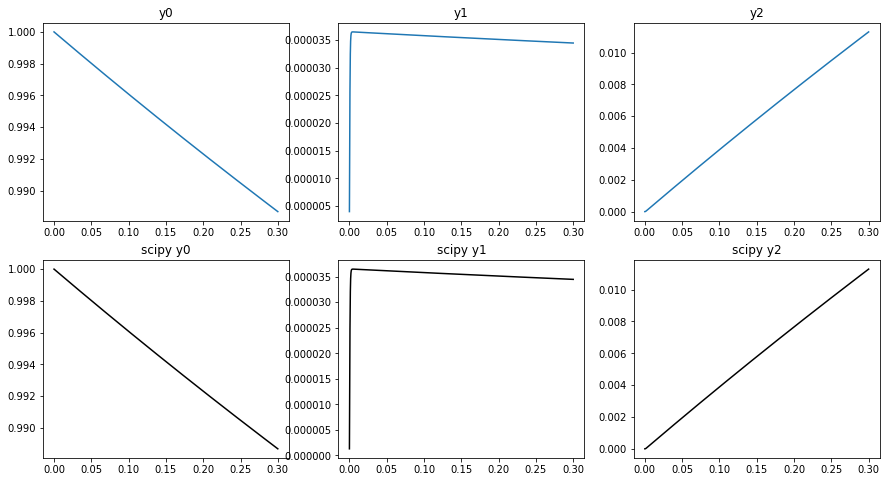

In [53]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i in range(3):
    axes[0][i].set_title('y{num}'.format(num=i))
    axes[0][i].plot(x, y[:, i])
    
for j in range(3):
    axes[1][j].set_title('scipy y{num}'.format(num=j))
    axes[1][j].plot(scipy_x, scipy_y[:, j], 'k')
    
#plt.show()
plt.savefig('plots')